In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
import re
import pandas as pd

# Define the pattern to extract information from each line
pattern = re.compile(r"epoch: (\d+), lr_model: ([\d.e-]+), lr_wav2vec2: ([\d.e-]+) - train loss: ([\d.e-]+) - valid loss: ([\d.e-]+), valid ctc_loss: ([\d.e-]+), valid PER: ([\d.e-]+), valid mpd_f1: ([\d.e-]+)")

# List to store extracted data
data = []

# Path to your text file
file_path = './train_log.txt'

# Read and process each line in the file
with open(file_path, 'r') as file:
    for line in file:
        match = pattern.match(line)
        if match:
            epoch, lr_adam, lr_wav2vec, train_loss, valid_loss, ctc_loss, per, mpd_f1 = match.groups()
            data.append({
                'epoch': int(epoch),
                'lr_model': float(lr_adam),
                'lr_wav2vec2': float(lr_wav2vec),
                'train_loss': float(train_loss),
                'valid_loss': float(valid_loss),
                'ctc_loss_valid': float(ctc_loss),
                'per_valid': float(per),
                'mpd_f1_valid': float(mpd_f1)
            })

# Create a DataFrame from the extracted data
df = pd.DataFrame(data)


In [4]:
df

,epoch,lr_model,lr_wav2vec2,train_loss,valid_loss,ctc_loss_valid,per_valid,mpd_f1_valid
0,6,0.000300,0.000010,3.060,2.620,2.620,91.36,0.205
1,7,0.000300,0.000010,2.460,1.640,1.640,50.91,0.278
2,8,0.000300,0.000010,1.650,1.030,1.030,33.66,0.334
3,9,0.000300,0.000010,1.220,0.809,0.808,27.15,0.372
4,10,0.000300,0.000010,1.070,0.724,0.723,24.33,0.361
5,11,0.000300,0.000010,0.989,0.665,0.664,22.88,0.361
6,12,0.000300,0.000010,0.983,0.636,0.635,22.44,0.372
7,13,0.000300,0.000010,0.885,0.603,0.603,21.56,0.383
8,14,0.000300,0.000010,0.855,0.582,0.581,20.86,0.404
9,15,0.000300,0.000010,0.900,0.572,0.572,21.16,0.381


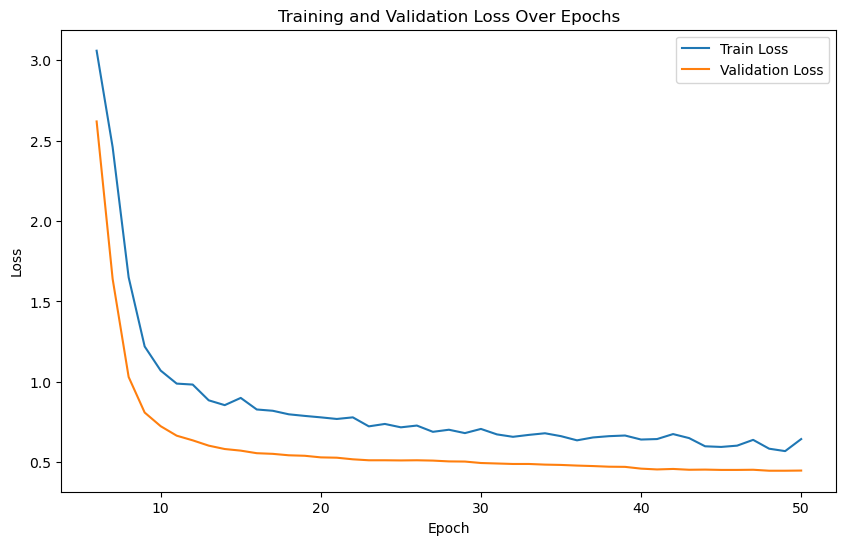

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_loss'], label='Train Loss')
plt.plot(df['epoch'], df['valid_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


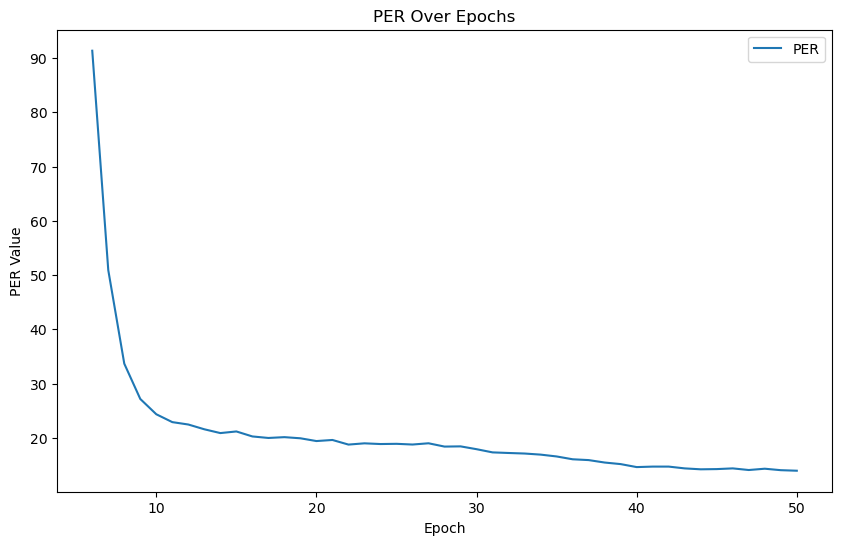

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['per_valid'], label='PER')
plt.title('PER Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('PER Value')
plt.legend()
plt.show()


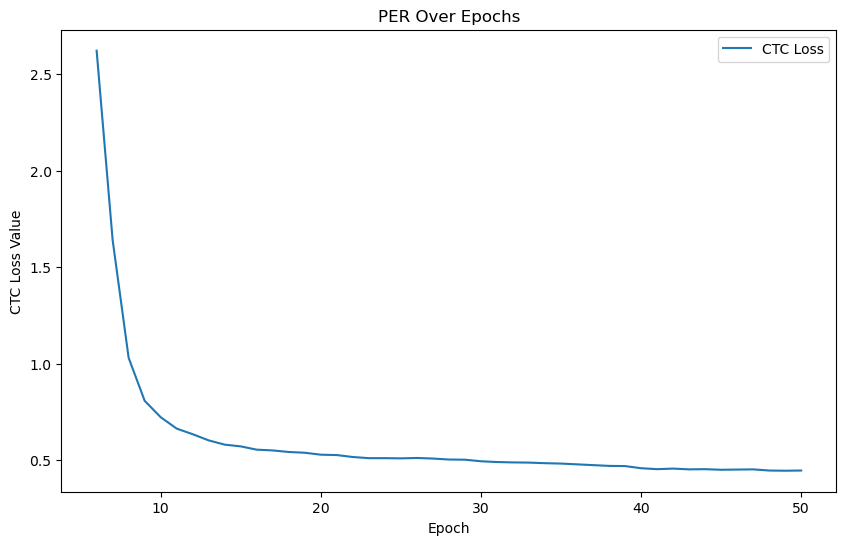

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['ctc_loss_valid'], label='CTC Loss')
plt.title('PER Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('CTC Loss Value')
plt.legend()
plt.show()

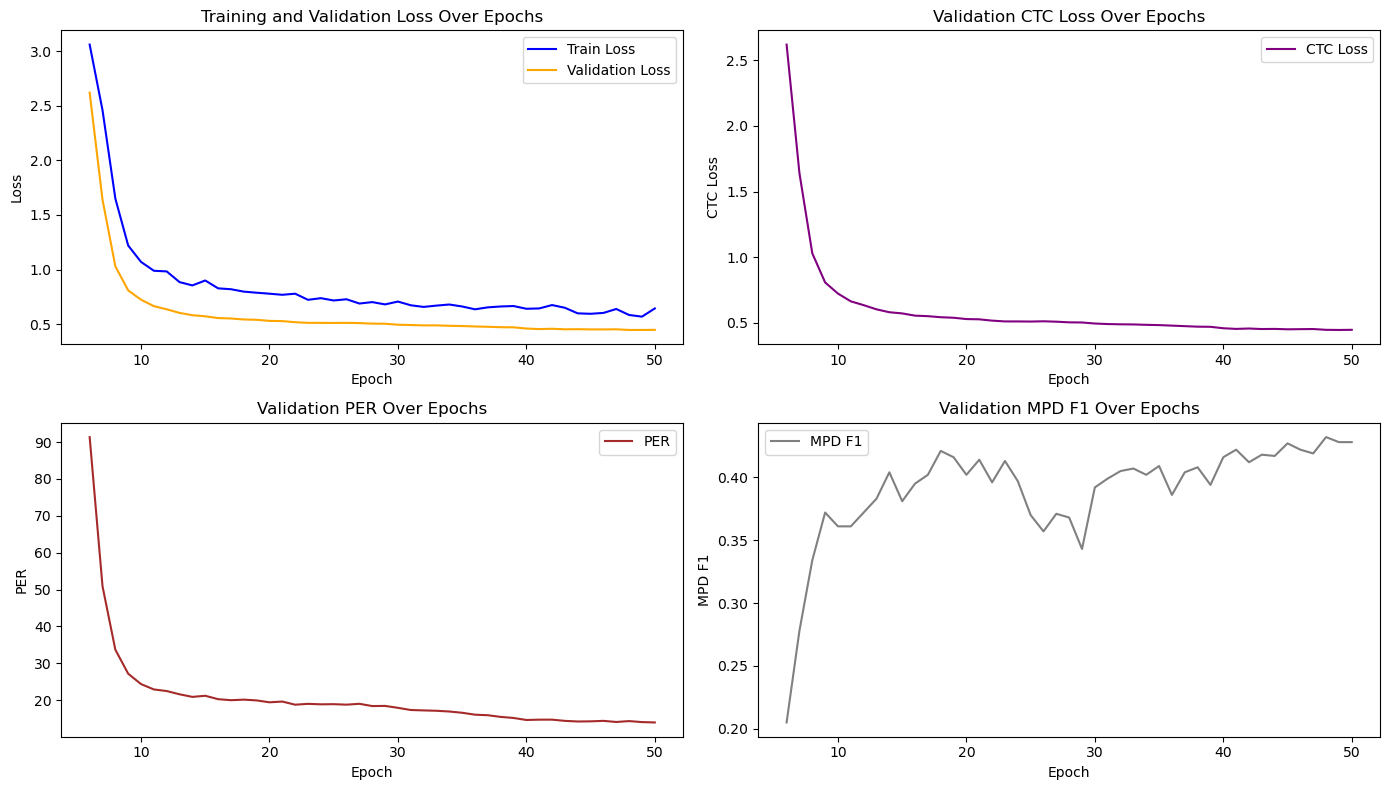

In [8]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss Over Epochs
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
plt.plot(df['epoch'], df['train_loss'], label='Train Loss', color='blue')
plt.plot(df['epoch'], df['valid_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Validation Metrics Over Epochs
plt.subplot(2, 2, 2)
plt.plot(df['epoch'], df['ctc_loss_valid'], label='CTC Loss', color='purple')
plt.title('Validation CTC Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('CTC Loss')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df['epoch'], df['per_valid'], label='PER', color='brown')
plt.title('Validation PER Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('PER')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df['epoch'], df['mpd_f1_valid'], label='MPD F1', color='gray')
plt.title('Validation MPD F1 Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MPD F1')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
best_epoch_per = df[df['per_valid'] == df['per_valid'].min()]['epoch'].values[0]
print(f'Best Epoch based on PER: {best_epoch_per}')

Best Epoch based on PER: 50


In [10]:
import pandas as pd
import re

# Read the file
with open('./wer_copy.txt', 'r') as file:
    data = file.read()

# Define regular expression patterns
alignment_pattern = re.compile(r'={2,}\n([^,]+), %WER (\d+\.\d+) \[ (\d+) / (\d+), (\d+) ins, (\d+) del, (\d+) sub \]\n(.*?)\n={2,}', re.DOTALL)

# Extract alignment details
matches = alignment_pattern.findall(data)

# Initialize lists to store data
file_ids,  wer_values, phoneme_error_count, total_phoneme_count, ins_values, del_values, sub_values, reference_phonemes, ins_sub_del_phonemes, hypothesis_phonemes =[], [], [], [], [], [], [], [], [], []

# Process data
for match in matches:
    file_ids.append(match[0].strip())
    wer_values.append(float(match[1]))
    phoneme_error_count.append(int(match[2]))
    total_phoneme_count.append(int(match[3]))
    ins_values.append(int(match[4]))
    del_values.append(int(match[5]))
    sub_values.append(int(match[6]))

    # Extract reference and hypothesis phonemes if available
    ref_hyp_lines = match[7].strip().split('\n')
    
    ref_line = [phoneme.strip() for phoneme in ref_hyp_lines[0].split(';')[1:]] if len(ref_hyp_lines) > 1 else []
    ins_sub_del_line = [phoneme.strip() for phoneme in ref_hyp_lines[1].split(';')[1:]] if len(ref_hyp_lines) > 1 else []
    hyp_line = [phoneme.strip() for phoneme in ref_hyp_lines[2].split(';')[1:]] if len(ref_hyp_lines) > 1 else []

    reference_phonemes.append(ref_line)
    hypothesis_phonemes.append(hyp_line)
    ins_sub_del_phonemes.append(ins_sub_del_line)

# Create DataFrame
df = pd.DataFrame({
    'File_ID': file_ids,
    'WER': wer_values,
    'Phoneme_Error_Count': phoneme_error_count,
    'Total_Phoneme_Count': total_phoneme_count,
    'INS': ins_values,
    'DEL': del_values,
    'SUB': sub_values,
    'Reference_Phonemes': reference_phonemes,
    'Ins_Del_Sub_Phonemes': ins_sub_del_phonemes,
    'Hypothesis_Phonemes': hypothesis_phonemes
})


